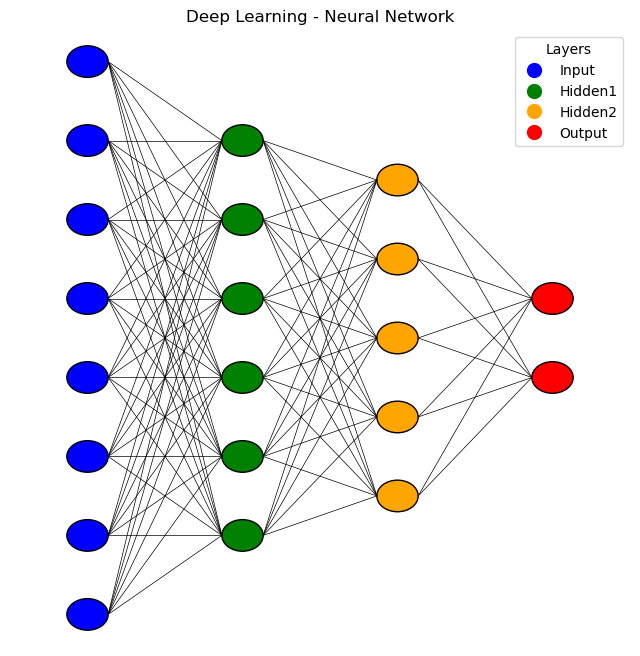

In [5]:
import matplotlib.pyplot as plt

# Define variables for the network architecture
num_inputs = 8
num_hidden1 = 6
num_hidden2 = 5
num_outputs = 2

# Define variables for the plot layout
node_radius = 0.8
node_spacing = 6
layer_spacing = 4

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('off')

# Compute the positions of the nodes in each layer
input_pos = [(0, (num_inputs-1)/2*layer_spacing-i*layer_spacing) for i in range(num_inputs)]
hidden1_pos = [(node_spacing, (num_hidden1-1)/2*layer_spacing-i*layer_spacing) for i in range(num_hidden1)]
hidden2_pos = [(node_spacing*2, (num_hidden2-1)/2*layer_spacing-i*layer_spacing) for i in range(num_hidden2)]
output_pos = [(node_spacing*3, (num_outputs-1)/2*layer_spacing-i*layer_spacing) for i in range(num_outputs)]

# Draw the nodes in each layer
input_circles = [plt.Circle(pos, node_radius, color='blue', ec='black') for pos in input_pos]
hidden1_circles = [plt.Circle(pos, node_radius, color='green', ec='black') for pos in hidden1_pos]
hidden2_circles = [plt.Circle(pos, node_radius, color='orange', ec='black') for pos in hidden2_pos]
output_circles = [plt.Circle(pos, node_radius, color='red', ec='black') for pos in output_pos]

# Add the nodes to the plot
for circle in input_circles + hidden1_circles + hidden2_circles + output_circles:
    ax.add_artist(circle)

# Draw the edges between the nodes
for i, input_circle in enumerate(input_circles):
    for j, hidden1_circle in enumerate(hidden1_circles):
        ax.plot([input_circle.center[0] + node_radius, hidden1_circle.center[0] - node_radius],
                [input_circle.center[1], hidden1_circle.center[1]], color='black', linewidth=0.5)
for i, hidden1_circle in enumerate(hidden1_circles):
    for j, hidden2_circle in enumerate(hidden2_circles):
        ax.plot([hidden1_circle.center[0] + node_radius, hidden2_circle.center[0] - node_radius],
                [hidden1_circle.center[1], hidden2_circle.center[1]], color='black', linewidth=0.5)
for i, hidden2_circle in enumerate(hidden2_circles):
    for j, output_circle in enumerate(output_circles):
        ax.plot([hidden2_circle.center[0] + node_radius, output_circle.center[0] - node_radius],
                [hidden2_circle.center[1], output_circle.center[1]], color='black', linewidth=0.5)

# Create the legend for the layer
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Input', markerfacecolor='blue', markersize=node_radius*15),
    plt.Line2D([0], [0], marker='o', color='w', label='Hidden1', markerfacecolor='green', markersize=node_radius*15),
    plt.Line2D([0], [0], marker='o', color='w', label='Hidden2', markerfacecolor='orange', markersize=node_radius*15),
    plt.Line2D([0], [0], marker='o', color='w', label='Output', markerfacecolor='red', markersize=node_radius*15)
]
# Set the axis limits and show the plot
ax.set_xlim(-node_spacing*0.5, node_spacing*3.5)
ax.set_ylim(-(num_inputs-1)/2*layer_spacing-node_radius*2, (num_inputs-1)/2*layer_spacing+node_radius*2)
legend = ax.legend(handles=legend_elements, loc='upper right')
legend.set_title('Layers')
plt.title('Deep Learning - Neural Network')
plt.show()

In [ ]:
# Checks availability of GPU selecting it if available, and comparing its performacne vs CPU
# CPU usually out performs on smaller data size and GPU on larger data size due to data copy time vs usage time
import torch
import timeit

data_size = 10000
iterations = 1000
precision = '.5f'

device='cpu'
a = torch.rand(data_size, device=device)
b = torch.rand((data_size, data_size), device=device)
result = timeit.timeit(lambda: a @ b, number=iterations)
print(f'{device} {result:{precision}}')
if(torch.cuda.is_available() or torch.backends.mps.is_available()):
    if torch.cuda.is_available():
        device='cuda'
    if torch.backends.mps.is_available():
        device='mps'
    a = torch.rand(data_size, device=device)
    b = torch.rand((data_size, data_size), device=device)
    result = timeit.timeit(lambda: a @ b, number=iterations)
    print(f'{device} {result:{precision}}')

# device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# Example of timing work duration
import time

start_time = time.time()
# do work here
time.sleep(1.234567)
end_time = time.time()
print(f'Seconds elapsed = {end_time - start_time}')